In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
x = torch.linspace(0,799, 800)

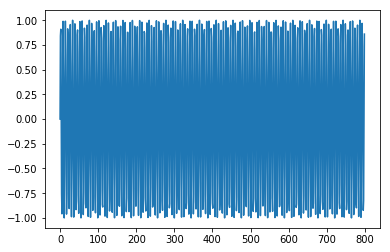

In [10]:
# Define Sine Wave
y = torch.sin(x)
plt.plot(x,y)

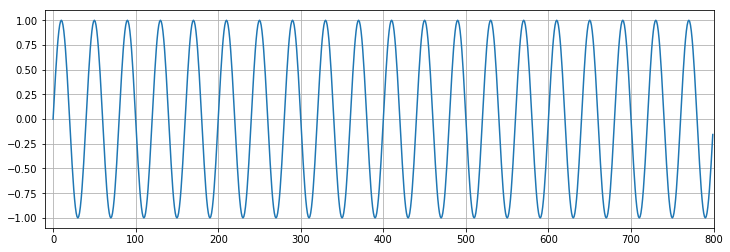

In [14]:
# Define Sine Wave
y = torch.sin(x*2*3.1416/40)
plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.plot(x,y)

In [15]:
# take the first 760 for the training test
# take the rest 40 for the test set
test_size = 40
train_set = y[:-test_size]
test_set = y[-test_size:]

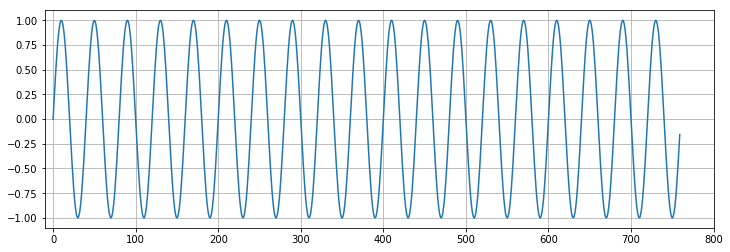

In [17]:
# Define Sine Wave
plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.plot(train_set)

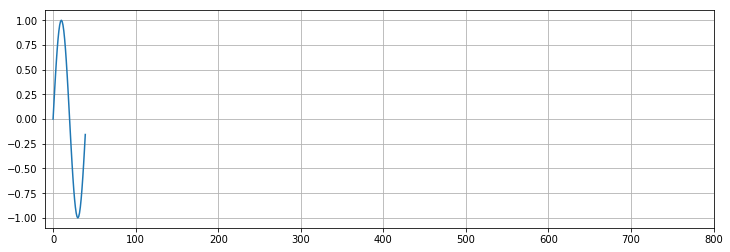

In [18]:
plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.plot(test_set)

In [19]:
def input_data(seq, ws):
    '''
        seq - sequence
        ws - window size
    '''
    out = [] # list of tuples that points to the next item.
             # ([1,2,3,4],[5]) , ([2,3,4,5],[6])
    L = len(seq)
    
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
        
    return out

In [20]:
window_size = 40
train_data = input_data(train_set,window_size)

In [21]:
len(train_data)

720

In [23]:
train_data[0]

(tensor([ 0.0000e+00,  1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,
          7.0711e-01,  8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
          1.0000e+00,  9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,
          7.0710e-01,  5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01,
         -7.2400e-06, -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01,
         -7.0711e-01, -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01,
         -1.0000e+00, -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01,
         -7.0710e-01, -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01]),
 tensor([1.4480e-05]))

In [27]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, out_size=1):
        '''
        input_size = input time series
        hidden_size = how many neurons you want inside the LSTM hidden layer
        out_size = number of predictions
        '''
        super().__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size, out_size)
        self.hidden = (torch.zeros(1,1,hidden_size), torch.zeros(1,1,hidden_size))
    def forward(self, seq):
        lstm_out, self.hidden = self.lstm(seq.view(len(seq),1,-1))
        
        pred = self.linear(lstm_out.view(len(seq),-1))
        
        # [1,2,3] [4] ---> We just want 4 from that value
        return pred[-1]

In [28]:
torch.manual_seed(42)
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [29]:
model

LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)